Analyse DHL SC data

In [21]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import matplotlib.pyplot as plt
import datetime as dt
from pygam import LinearGAM
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
volume_2019_filepath = "/Volumes/C19GiGdata/DHL_SC/2019_volumes.csv"
volume_2020_filepath = "/Volumes/C19GiGdata/DHL_SC/2020_volumes.csv"
volumes2019 = pd.read_csv(volume_2019_filepath,header=3)#,header=4,usecols=range(489),skiprows=[65])
volumes2020 = pd.read_csv(volume_2020_filepath,header=3)


In [23]:
last = ''
for i in np.arange(len(volumes2019['Location'])):
    if pd.isnull(volumes2019['Location'][i]):
        volumes2019['Location'][i] = last
    last = volumes2019['Location'][i]
df2019 = volumes2019[volumes2019['Home Delivery Activity'] == 'Total']
totals2019 = df2019[df2019['Location'] != 'Total']

for i in np.arange(len(volumes2020['Location'])):
    if pd.isnull(volumes2020['Location'][i]):
        volumes2020['Location'][i] = last
    last = volumes2020['Location'][i]
df2020 = volumes2020[volumes2020['Home Delivery Activity'] == 'Total']
totals2020 = df2020[df2020['Location'] != 'Total']

/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [24]:
Locations = np.array(totals2020['Location'])

In [25]:
df = pd.read_csv(volume_2019_filepath,header=2)
dates2019 = []
for col in df:
    try:
        date = dt.datetime.strptime(col,"%d-%b-%Y")
        dates2019.append(date.strftime("%d/%m/%y"))
    except:
        pass


In [26]:
df = pd.read_csv(volume_2020_filepath,header=2)
dates2020 = []
for col in df:
    try:
        date = dt.datetime.strptime(col,"%d-%b-%Y")
        dates2020.append(date.strftime("%d/%m/%y"))
    except:
        pass

In [27]:
volcounts2019 = np.zeros((len(totals2019['Location']),len(dates2019)))
vehicles2019 = np.zeros((len(totals2019['Location']),len(dates2019)))
j = 0
for loc in totals2019['Location']:
    i = 0
    for d in dates2019:
        if i > 0:
            volcounts2019[j,i] = float(totals2019['Drops.%d'%i][totals2019['Location']==loc])
            vehicles2019[j,i] = float(totals2019['Vehicles.%d'%i][totals2019['Location']==loc])
        else:
            volcounts2019[j,i] = float(totals2019['Drops'][totals2019['Location']==loc])
            vehicles2019[j,i] = float(totals2019['Vehicles'][totals2019['Location']==loc])
        i += 1
    j += 1
volcounts2019[np.isnan(volcounts2019)] = 0
vehicles2019[np.isnan(vehicles2019)] = 0

In [28]:
volcounts2020 = np.zeros((len(totals2020['Location']),len(dates2020)))
vehicles2020 = np.zeros((len(totals2020['Location']),len(dates2020)))
j = 0
for loc in totals2020['Location']:
    i = 0
    for d in dates2020:
        if i > 0:
            volcounts2020[j,i] = float(totals2020['Drops.%d'%i][totals2020['Location']==loc])
            vehicles2020[j,i] = float(totals2020['Vehicles.%d'%i][totals2020['Location']==loc])
        else:
            volcounts2020[j,i] = float(totals2020['Drops'][totals2020['Location']==loc])
            vehicles2020[j,i] = float(totals2020['Vehicles'][totals2020['Location']==loc])
        i += 1
    j += 1
volcounts2020[np.isnan(volcounts2020)] = 0
vehicles2020[np.isnan(vehicles2020)] = 0

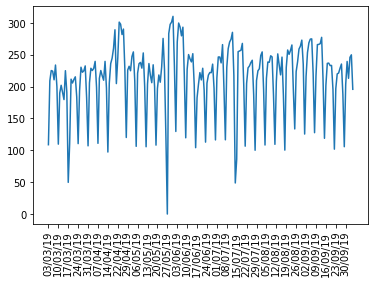

In [29]:
plt.plot(dates2019,np.mean(volcounts2019,axis=0))
plt.xticks(np.array(dates2019)[np.arange(0,len(dates2019),7)],rotation=90)
plt.show()

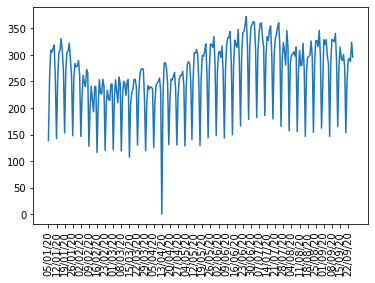

In [30]:
plt.plot(dates2020,np.mean(volcounts2020,axis=0))
plt.xticks(np.array(dates2020)[np.arange(0,len(dates2020),7)],rotation=90)
plt.show()

In [31]:
dates = dates2019 + dates2020
drops = np.concatenate((volcounts2019,volcounts2020),axis=1)
vans = np.concatenate((vehicles2019,vehicles2020),axis=1)
xticks = []
for date in dates:
    if date[0:2] == '01':
        xticks.append(date)

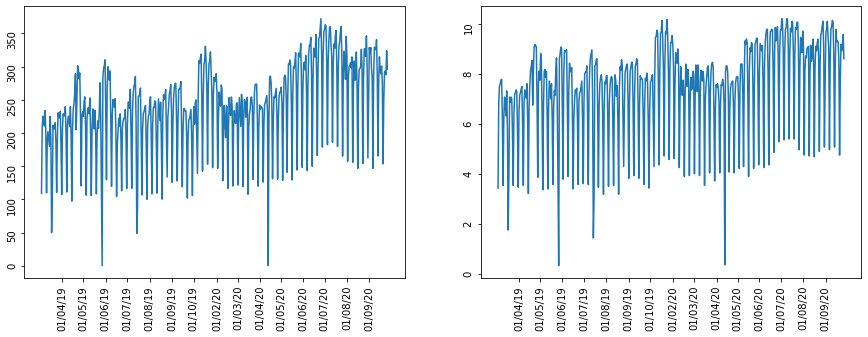

In [32]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].plot(dates,np.mean(drops,axis=0))
ax[1].plot(dates,np.mean(vans,axis=0))
ax[0].set_xticks(xticks)
ax[0].tick_params(labelrotation=90)
ax[1].set_xticks(xticks)
ax[1].tick_params(labelrotation=90)
plt.show()

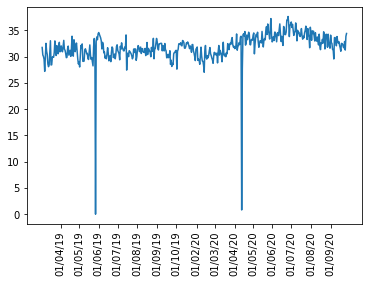

In [33]:
plt.plot(dates,np.mean(drops,axis=0)/np.mean(vans,axis=0))
plt.xticks(xticks,rotation=90)
plt.show()

In [34]:
X = np.arange(len(dates))
Y = np.sum(drops,axis=0)
gam = LinearGAM().fit(X, Y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     12.9464
Link Function:                     IdentityLink Log Likelihood:                                 -7489.7928
Number of Samples:                          480 AIC:                                            15007.4783
                                                AICc:                                           15008.3747
                                                GCV:                                          2506599.1071
                                                Scale:                                        2385206.4827
                                                Pseudo R-Squared:                                   0.2838
Feature Function                  Lam

/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  after removing the cwd from sys.path.


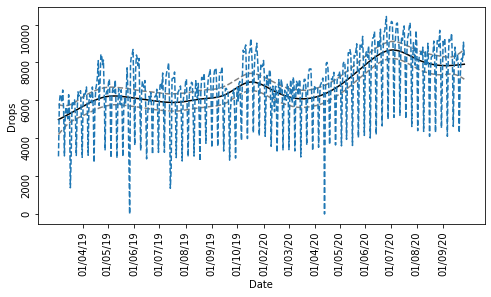

In [35]:
pdep, cint = gam.partial_dependence(0,X=X,width=.95)
fig,ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(X,gam.coef_[-1]*np.ones(len(X)) + pdep, c='k')
ax.plot(X,gam.coef_[-1]*np.ones(len(X)) + cint[:, 0], c='grey', ls='--')
ax.plot(X,gam.coef_[-1]*np.ones(len(X)) + cint[:, 1], c='grey', ls='--')
#ax.plot(np.arange((Ylen - len(Weekly_tot_sent)),Ylen)*7,np.array(Weekly_tot_sent)/7,c='C1')
ax.plot(dates,Y,'--',c='C0')
ax.set_xticks(xticks)
ax.tick_params(labelrotation=90)
ax.set_xlabel('Date')
ax.set_ylabel('Drops')
plt.show()

In [36]:
demand = gam.coef_[-1]*np.ones(len(dates)) + pdep
demandlow = gam.coef_[-1]*np.ones(len(X)) + cint[:, 0]
demandupp = gam.coef_[-1]*np.ones(len(X)) + cint[:, 1]
df = pd.DataFrame({'Dates': dates, 'Demand': demand, 'Demand Upper Conf': demandupp,\
                  'Demand Lower Conf': demandlow})
df.to_pickle('Demand_DHLSC.pkl')

In [16]:
wdays = np.zeros(len(dates),dtype=np.object)
i = 0
WeekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
for d in dates:
    date = dt.datetime.strptime(d,"%d/%m/%y")
    wdays[i] = WeekDays[date.weekday()]
    i += 1

X1 = np.zeros((len(Locations)*len(dates)),dtype=(np.unicode,16))
X2 = np.zeros((len(Locations)*len(dates)),dtype=(np.unicode,16))
X3 = np.zeros((len(Locations)*len(dates)))
Y1 = np.zeros((len(Locations)*len(dates)))
for i in np.arange(len(Locations)):
    for j in np.arange(len(dates)):
        X1[i*len(dates)+j] = wdays[j]
        X2[i*len(dates)+j] = Locations[i]
        X3[i*len(dates)+j] = demand[j]
        Y1[i*len(dates)+j] = Y[i,j]

IndexError: too many indices for array

In [17]:
print(len(Locations))

28


In [89]:
fitdata = {'DROPS': Y1, 'DAY_OF_WEEK': X1, 'LOCATION': X2, 'DEMAND': X3}
df_train = pd.DataFrame(fitdata, columns=['DROPS','DAY_OF_WEEK','LOCATION','DEMAND'])
expr = """DROPS ~ DAY_OF_WEEK + LOCATION + DEMAND"""
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
df_train['DD_LAMBDA'] = poisson_training_results.mu
df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['DROPS'] - x['DD_LAMBDA'])**2 - x['DROPS']) / x['DD_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ DD_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df_train).fit()
alpha = aux_olsr_results.params['DD_LAMBDA']
res_lambda = 1
res_alpha = 1
while res_alpha > 1E-9 or res_lambda > 1E-9:
    lambdas_old = df_train['DD_LAMBDA'].copy()
    alpha_old = alpha.copy()
    negbin_training_results = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial(alpha=alpha)).fit()
    df_train['DD_LAMBDA'] = negbin_training_results.mu
    df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['DROPS'] - x['DD_LAMBDA'])**2 - x['DROPS']) / x['DD_LAMBDA'], axis=1)
    aux_olsr_results = smf.ols(ols_expr, df_train).fit()
    alpha = aux_olsr_results.params['DD_LAMBDA']
    res_lambda = np.sum((df_train['DD_LAMBDA'] - lambdas_old)**2)/lambdas_old.size
    res_alpha = (alpha - alpha_old)**2
    print(alpha,res_alpha,res_lambda)
print('alpha fit t_value', aux_olsr_results.tvalues)
fitted_summary_frame = negbin_training_results.get_prediction(X_train).summary_frame()
fitted_counts=fitted_summary_frame['mean']
print(negbin_training_results.summary())

0.030595474060668607 5.806147539420266e-07 39.863891105962615
0.030602293182931308 4.650042843367288e-11 0.0016515700112385125
0.03060235335614475 3.6208156160847574e-15 1.2829620443103005e-07
0.030602353887039378 2.818491048406789e-19 9.987418250893197e-12
alpha fit t_value DD_LAMBDA    41.904368
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  DROPS   No. Observations:                13440
Model:                            GLM   Df Residuals:                    13405
Model Family:        NegativeBinomial   Df Model:                           34
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -80156.
Date:                Tue, 13 Oct 2020   Deviance:                       43787.
Time:                        10:00:15   Pearson chi2:                 2.83e+04
No. Iterations:                     8                 

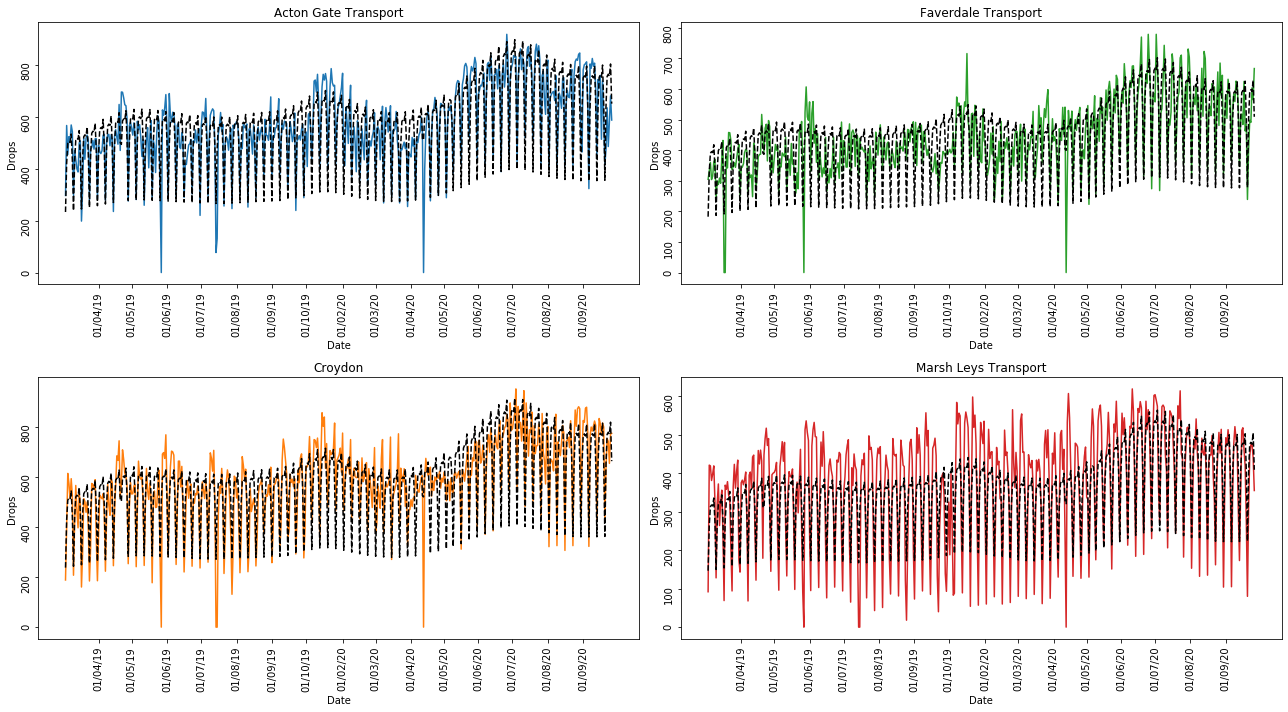

In [105]:
fitted_counts = np.array(fitted_counts).reshape(Y.shape)
fig,ax = plt.subplots(2,2,figsize=(18,10))
for i in np.arange(4):
    ax[i%2][int(i/2)].plot(dates,Y[i*6+1,:],color='C%d'%i)
    ax[i%2][int(i/2)].plot(dates,fitted_counts[i*6+1,],'--',color='k'%i)
    ax[i%2][int(i/2)].set_xticks(xticks)
    ax[i%2][int(i/2)].tick_params(labelrotation=90)
    ax[i%2][int(i/2)].set_title('%s'%Locations[i*6+1])
    ax[i%2][int(i/2)].set_xlabel('Date')
    ax[i%2][int(i/2)].set_ylabel('Drops')
fig.tight_layout()